# Background
저번 연구에서 이격도와 수익이 반비례 관계라는 것을 확인하였다.  
이번 연구에서는 10선이 더 잘 예측하는지, 20선이 더 잘 예측하는지 확인한다.  
유튜브: https://youtu.be/Snr3Z88K3-w

# Import

In [70]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [71]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,1
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,1
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,1
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,1
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,1


# Preprocessing

In [72]:
df['체결시간'] = pd.to_datetime(df['체결시간']).apply(lambda x : x.replace(second=00))

In [73]:
list_1 = []
list_2 = []

for i in range(len(df)):
    date = df.iloc[i]['주문일자']
    firm = df.iloc[i]['종목명']
    time = df.iloc[i]['체결시간']
    buy = df.iloc[i]['매수가']
    
    try:
        frame = pd.read_csv('minute/'+date+'_'+firm+'.csv')
        frame['시간'] = pd.to_datetime(frame['시간']).apply(lambda x : x.replace(second=00))
        frame = frame[frame['시간'] == time]
        frame = frame.reset_index(drop=True)
        
        ten = frame['10'].iloc[0]
        ten_change = round(((buy-ten) / ten)*100, 2)
        twenty = frame['20'].iloc[0]
        twenty_change = round(((buy-twenty) / twenty)*100, 2)
        
    except:
        ten_change = 0
        twenty_change = 0
        
    list_1.append(ten_change)
    list_2.append(twenty_change)
    
df['10이격도'] = list_1
df['20이격도'] = list_2

In [74]:
df = df[df['10이격도'] != 0]
df = df[df['뉴스기사'] == 1]
df

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,10이격도,20이격도
93,2022-04-08,2022-04-14 09:30:00,NHN벅스,17350,-0.58,NaN,104200,14.90,20.86,3.31,1,2.78,4.99
94,2022-04-08,2022-04-14 09:56:00,NHN벅스,17450,-1.72,NaN,104200,15.56,20.86,3.31,1,1.31,1.28
95,2022-04-08,2022-04-14 09:47:00,코스모화학,16250,-1.85,NaN,5420,11.68,13.06,0.69,1,4.80,6.47
105,2022-04-12,2022-04-14 09:45:00,티사이언티픽,4505,-2.11,NaN,57680,20.78,22.65,14.08,1,0.49,0.65
106,2022-04-12,2022-04-14 09:55:00,GS글로벌,4050,2.84,NaN,1250,13.92,24.89,5.34,1,1.21,1.33
107,2022-04-13,2022-04-14 10:01:00,LG헬로비전,6160,1.95,NaN,37560,19.15,29.98,5.61,1,0.65,0.57


# Visualization
10선과 20선은 큰 차이가 없다.    
2% 이후에 진입하면 전부 손실이다.  
2% 이내에 진입해야 적어도 손실을 피할 수 있다. 

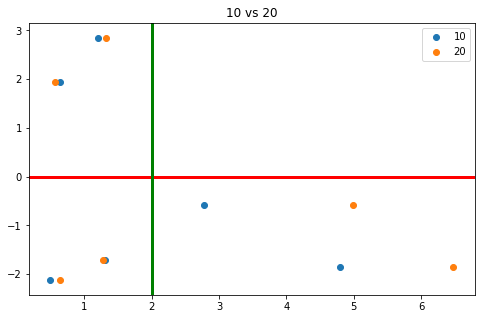

In [81]:
plt.figure(figsize=(8,5))
plt.title('10 vs 20')
plt.scatter(df['10이격도'], df.수익률, label='10')
plt.scatter(df['20이격도'], df.수익률, label='20')
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=2, color='g', linewidth=3)
plt.legend()
plt.show()

# Conclusion
이격도 2% 이내에서 진입한다.